In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/PoorvaRane/Emotion-Detector/refs/heads/master/ISEAR.csv",names=['emotion','text','unamed'])
data=data.drop(columns=['unamed'])

In [4]:
data["emotion"].unique()

array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt',
       'guit'], dtype=object)

In [5]:
data["emotion"].value_counts()

emotion
joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1049
guit          1
Name: count, dtype: int64

In [6]:
data=data[data['emotion']!="guit"]

In [7]:
import nltk
nltk.download("punkt_tab")
nltk.download("wordnet")
import string
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
s=set(stopwords.words("english"))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def preprocess(x):
    i=x.lower()
    t=nltk.word_tokenize(i)
    p=[i for i in t if i not in string.punctuation]
    st=[i for i in p if i not in s]
    f=' '.join(st)
    return f

In [9]:
data['text']=data['text'].apply(preprocess)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=8000) 
x = vectorizer.fit_transform(data['text'])

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(data['emotion'])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.75,random_state=42)

In [13]:
from sklearn.svm import LinearSVC
model = LinearSVC(dual='auto',random_state=42)

In [14]:
model.fit(x_train,y_train)

LinearSVC(dual='auto', random_state=42)

In [15]:
pred=model.predict(x_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       279
           1       0.57      0.52      0.54       273
           2       0.70      0.69      0.69       268
           3       0.41      0.42      0.41       238
           4       0.74      0.63      0.68       322
           5       0.57      0.61      0.59       255
           6       0.44      0.51      0.47       244

    accuracy                           0.55      1879
   macro avg       0.55      0.55      0.55      1879
weighted avg       0.56      0.55      0.55      1879



In [17]:
from sklearn.svm import SVC
model1 = SVC(random_state=42,kernel='rbf')

In [18]:
model1.fit(x_train,y_train)

SVC(random_state=42)

In [19]:
pred1=model.predict(x_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       279
           1       0.57      0.52      0.54       273
           2       0.70      0.69      0.69       268
           3       0.41      0.42      0.41       238
           4       0.74      0.63      0.68       322
           5       0.57      0.61      0.59       255
           6       0.44      0.51      0.47       244

    accuracy                           0.55      1879
   macro avg       0.55      0.55      0.55      1879
weighted avg       0.56      0.55      0.55      1879



In [21]:
from sklearn.svm import SVC
model2 = SVC(random_state=42,kernel='poly')

In [22]:
model2.fit(x_train,y_train)

SVC(kernel='poly', random_state=42)

In [23]:
pred2=model.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       279
           1       0.57      0.52      0.54       273
           2       0.70      0.69      0.69       268
           3       0.41      0.42      0.41       238
           4       0.74      0.63      0.68       322
           5       0.57      0.61      0.59       255
           6       0.44      0.51      0.47       244

    accuracy                           0.55      1879
   macro avg       0.55      0.55      0.55      1879
weighted avg       0.56      0.55      0.55      1879



In [26]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

In [32]:
from sklearn.metrics import accuracy_score
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"Kernel: {kernel}, Accuracy: {acc:.4f}")

Kernel: linear, Accuracy: 0.5418
Kernel: rbf, Accuracy: 0.5556
Kernel: poly, Accuracy: 0.4657
Kernel: sigmoid, Accuracy: 0.5396


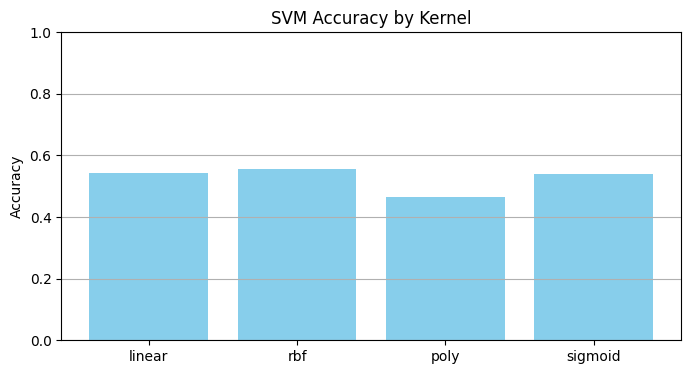

In [33]:
import matplotlib.pyplot as py
plt.figure(figsize=(8, 4))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("SVM Accuracy by Kernel")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()